# Dependencies 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential


# Normalization

In [4]:
(x_train,_) , (x_test,_)= mnist.load_data()
x_train= x_train.astype('float32')/225.
x_test= x_test.astype('float32')/225.
x_train=np.reshape(x_train,(len(x_train), 28,28,1))
x_test=np.reshape(x_test,(len(x_test),28,28,1))


# Adding some nises to increase accuracuy 

In [19]:
noise_factor=0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 


In [20]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Displaying images with noise

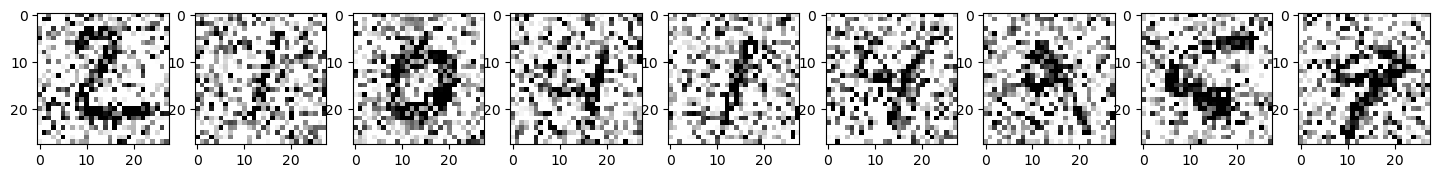

In [21]:
plt.figure(figsize=(20,2))
for i in range(1, 10):
    ax=plt.subplot(1,10,i)
    plt.imshow(x_test_noisy[i].reshape(28,28), cmap="binary")
plt.show()

# Creating model

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))


In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)            │ (None, 28, 28, 32)    │          320 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_9               │ (None, 14, 14, 32)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_22 (Conv2D)            │ (None, 14, 14, 8)     │        2,312 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_10              │ (None, 7, 7, 8)       │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_23 (Conv2D)            │ (None, 7, 7, 8)       │          584 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_11              │ (None, 4, 4, 8)       │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_24 (Conv2D)            │ (None, 4, 4, 8)       │          584 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ up_sampling2d_9               │ (None, 8, 8, 8)       │            0 │
│ (UpSampling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_25 (Conv2D)            │ (None, 8, 8, 8)       │          584 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ up_sampling2d_10              │ (None, 16, 16, 8)     │            0 │
│ (UpSampling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_26 (Conv2D)            │ (None, 14, 14, 32)    │        2,336 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ up_sampling2d_11              │ (None, 28, 28, 32)    │            0 │
│ (UpSampling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_27 (Conv2D)            │ (None, 28, 28, 1)     │          289 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 7,009 (27.38 KB)

 Trainable params: 7,009 (27.38 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - loss: 0.0847 - val_loss: 0.0533
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - loss: 0.0511 - val_loss: 0.0454
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - loss: 0.0447 - val_loss: 0.0424
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 120ms/step - loss: 0.0414 - val_loss: 0.0388
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 113ms/step - loss: 0.0390 - val_loss: 0.0371
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - loss: 0.0374 - val_loss: 0.0360
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - loss: 0.0360 - val_loss: 0.0350
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - loss: 0.0350 - val_loss: 0.0336
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - loss: 0.0340 - val_loss: 0.0334
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - loss: 0.0332 - val_loss: 0.0322


# Evaluating the model 

In [31]:
model.evaluate(x_test_noisy, x_test)
no_noise_img = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0323
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [32]:
model.save('denoising_autoencoder.h5')


# Showing the results 

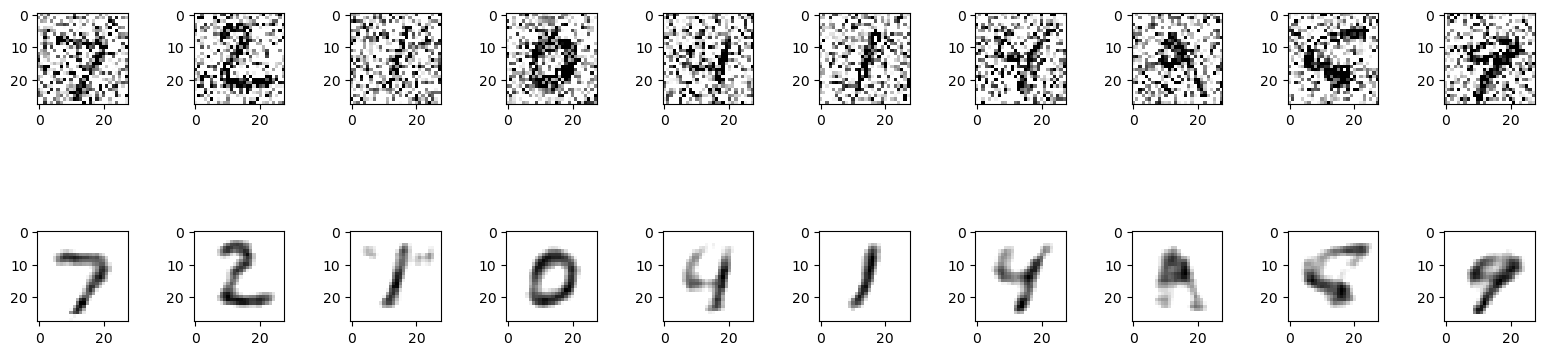

In [33]:
plt.figure(figsize=(40, 4))
for i in range(10):
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()
